# Linear regression using SKLearn on your own Data!
This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!

In [43]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

# Data Loading, Cleaning, and Setup

Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html

In [2]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [3]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)

length = len(my_data.index) #save length of array of later

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 

<AxesSubplot:>

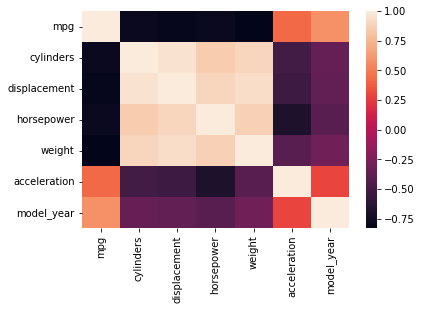

In [5]:
sns.heatmap(my_data.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.


In [6]:
X = my_data["horsepower"].to_numpy()
y = my_data["mpg"].to_numpy()

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Split the data
Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.

np docs - https://numpy.org/doc/stable/reference/index.html#reference

In [7]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

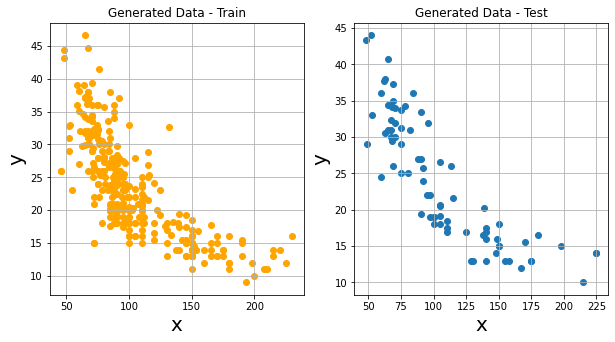

In [8]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting

In [9]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[39.37992066] [-0.15476881]


### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [10]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

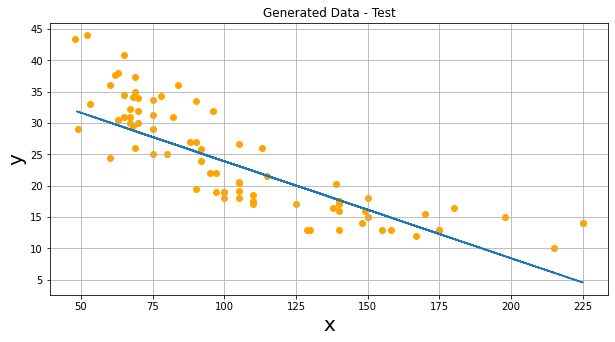

In [11]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [12]:
print(linr.score(x_test, y_test))

0.6720392107857677


In [13]:
MAE = np.mean(abs(y_test - y_hat))
MAE

8.988585235103281

# Our own data

Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 



In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [45]:
housePrice = pd.read_csv("Data/kc_house_data.csv")
zipcodedf = pd.read_csv("Data/usa_zipcode_of_wa.csv")
housePrice.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
zipcodedf = zipcodedf.dropna(subset=['City'])
zipcodedf = zipcodedf.rename(columns = {"zip":"zipcode"})
zipcodedf

,zipcode,Zipcode name,City,State,County Name
0,98520,"ABERDEEN, WA",ABERDEEN,WA,GRAYS HARBOR
1,98220,"ACME, WA",ACME,WA,WHATCOM
2,99101,"ADDY, WA",ADDY,WA,STEVENS
3,98522,"ADNA, WA",ADNA,WA,LEWIS
4,99001,"AIRWAY HEIGHTS, WA",AIRWAY HEIGHTS,WA,SPOKANE
...,...,...,...,...,...
688,98907,"YAKIMA, WA",YAKIMA,WA,YAKIMA
689,98908,"YAKIMA, WA",YAKIMA,WA,YAKIMA
690,98909,"YAKIMA, WA",YAKIMA,WA,YAKIMA
691,98597,"YELM, WA",YELM,WA,THURSTON


In [47]:
zipcodedf['zipcode'] = zipcodedf['zipcode'].astype(int)

In [48]:
merged_zip = pd.merge(zipcodedf, housePrice, on ="zipcode")

#### Data Cleaning



In [49]:
merged_zip.head()

,zipcode,Zipcode name,City,State,County Name,id,date,price,bedrooms,bathrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,"AUBURN, WA",AUBURN,WA,KING,7895500070,20150213T000000,240000.0,4,1.0,...,2,7,890,330,1969,0,47.3341,-122.282,1290,7800
1,98001,"AUBURN, WA",AUBURN,WA,KING,3717000160,20141009T000000,287000.0,4,2.5,...,3,7,2240,0,2005,0,47.3378,-122.257,2221,4557
2,98001,"AUBURN, WA",AUBURN,WA,KING,8961960160,20141028T000000,480000.0,4,2.5,...,3,9,2520,710,2001,0,47.3183,-122.253,2640,8517
3,98001,"AUBURN, WA",AUBURN,WA,KING,4014400292,20150114T000000,465000.0,3,2.5,...,3,9,2714,0,2005,0,47.3185,-122.275,2590,18386
4,98001,"AUBURN, WA",AUBURN,WA,KING,1115450240,20141022T000000,360000.0,4,2.5,...,3,9,2160,0,1992,0,47.3341,-122.255,2280,9937


In [50]:
# drop zipcode, zipcode name, id, State, lat, long, County Name
merged_zip = merged_zip.drop(['zipcode', 'Zipcode name', 'id', 'State', 'lat', 'long', 'County Name'], axis = 1)
merged_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [51]:
# convert date into datetime and split year, month, and day from it
merged_zip['date'] = pd.to_datetime(merged_zip['date'])
merged_zip['year'] = merged_zip['date'].dt.year
merged_zip['month'] = merged_zip['date'].dt.month

# calculate house age starting from the year that the house was sold
merged_zip = merged_zip.drop(["date"],axis = 1)
merged_zip['yr_age'] = abs(merged_zip['year'] - merged_zip["yr_built"])
merged_zip['yr_age']

0        46
1         9
2        13
3        10
4        22
         ..
21608    26
21609    23
21610    20
21611    35
21612     1
Name: yr_age, Length: 21613, dtype: int64

In [52]:
# use 0 and 1 to represent whether the house is renewed or not
merged_zip['renovation'] = np.where(merged_zip['yr_renovated']==0,0,1)
merged_zip.drop(['yr_renovated'], inplace=True, axis=1)
print(merged_zip['renovation'].value_counts())

0    20699
1      914
Name: renovation, dtype: int64


In [0]:
merged_zip.head()

In [53]:
merged_zip = pd.concat([merged_zip,pd.get_dummies(merged_zip["City"],prefix = "city")],axis = 1)  
merged_zip = merged_zip.drop(["City"], axis = 1)
merged_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,city_MEDINA,city_MERCER ISLAND,city_NORTH BEND,city_REDMOND,city_RENTON,city_SAMMAMISH,city_SEATTLE,city_SNOQUALMIE,city_VASHON,city_WOODINVILLE
0,240000.0,4,1.0,1220,8075,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
1,287000.0,4,2.5,2240,4648,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,480000.0,4,2.5,3230,16171,2.0,0,3,3,9,...,0,0,0,0,0,0,0,0,0,0
3,465000.0,3,2.5,2714,17936,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
4,360000.0,4,2.5,2160,9528,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0


### Polynomial Features regression:



In [24]:
length = len(merged_zip.index)

X = merged_zip[["bedrooms", "bathrooms", "sqft_living", "yr_age"]].to_numpy()
y = merged_zip["price"].to_numpy()

KeyError: "['yr_age'] not in index"

In [35]:
temp_df = merged_zip.drop(["price"], axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#degree=9
#polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
highest_score = 0

In [77]:
lst = []
for feature in temp_df.columns:
    lst.append(feature)
    print(lst)
    X = temp_df[lst].to_numpy()
    y = merged_zip["price"].to_numpy()
    b_train, b_test, c_train, c_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if len(lst) == 1:
        b_train.reshape(-1,1)
        c_train.reshape(-1,1)
    linreg = LinearRegression()
    linreg.fit(b_train, c_train)
    yhat = linreg.predict(b_test)
    #print(linreg.score(b_test, c_test))
    meanavg = np.mean(abs(c_test-yhat))
    #print(" " , meanavg)
    if linreg.score(b_test, c_test) > highest_score:
        highest_score = linreg.score(b_test, c_test)
    print(highest_score)
        

['bedrooms']
0.10110407509553343
['bedrooms', 'bathrooms']
0.27410146616687814
['bedrooms', 'bathrooms', 'sqft_living']
0.5029996890804095
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
0.5053647482215009
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
0.5053647482215009
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']
0.5263340967759287
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view']
0.5450566796372054
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
0.5546252629362318
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']
0.5966856631818063
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above']
0.5979115394004765
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sq

In [29]:
G = merged_zip[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'yr_age']]
E = merged_zip["price"]

In [30]:

G_train, G_test, E_train, E_test = train_test_split(G, E, test_size=0.2, random_state=42)

ValueError: x and y must be the same size

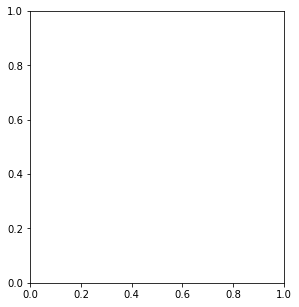

In [31]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(G_train,E_train, c='orange')  
plt.xlabel('G', fontsize = 20) 
plt.ylabel('E', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(G_test, E_test)  
plt.xlabel('G', fontsize = 20) 
plt.ylabel('E', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [32]:
E_train.shape

(17290,)

In [103]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

G_poly=poly_reg.fit_transform(G_train)

G_test_poly = poly_reg.transform(G_test)

lin_reg2=LinearRegression()
lin_reg2.fit(G_poly,E_train)

LinearRegression()

In [104]:
y_hat2 = lin_reg2.predict(G_test_poly)

In [105]:
print(lin_reg2.score(G_test_poly, E_test))

0.7339775389306663


In [106]:
MAE2 = np.mean(abs(E_test - y_hat2))
MAE2

123223.983696801

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(),LinearRegression())

params = {'polynomialfeatures__degree':[1,2,3]}


#pipe.fit(G_train, E_train)

search = GridSearchCV(estimator = pipe, param_grid = params, scoring = "neg_mean_squared_error")

search.fit(G_train, E_train)

print(search.best_params_)
print(search.best_score_)


{'polynomialfeatures__degree': 2}
-38973525210.767715


In [33]:
y_hat = linr.predict(G_test)

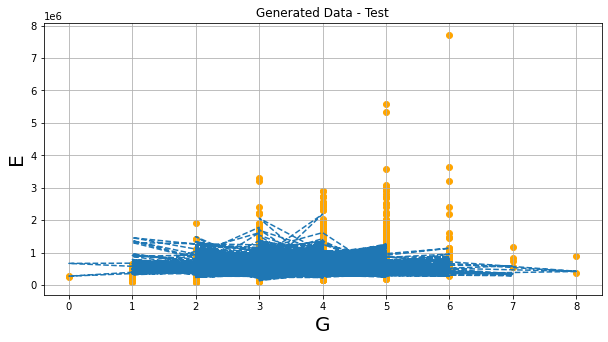

In [103]:
plt.figure(figsize=(10,5))
plt.plot(G_test, y_hat, '--')

plt.scatter(G_test,E_test, c='orange')  
plt.xlabel('G', fontsize = 20) 
plt.ylabel('E', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [104]:
print(linr.score(G_test, E_test))


0.10926882105108959


In [105]:
MAE = np.mean(abs(E_test - y_hat))
MAE

293158.1998741487

<AxesSubplot:>

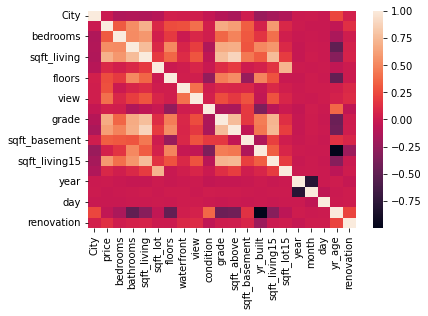

In [37]:
sns.heatmap(merged_zip.corr())

### Decision Tree:



In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X_tree = merged_zip.drop(["price"], axis = 1)
y_tree = merged_zip["price"]


regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)
#x_train= x_train.reshape(-1, 2)
#x_test = x_test.reshape(-1, 2)

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
Price = regressor.predict(x_test)

In [68]:
MEA= np.mean(abs(y_test - Price))
MEA

121249.02729585936

In [69]:
r2_score(y_test,Price)

0.6249917759039725

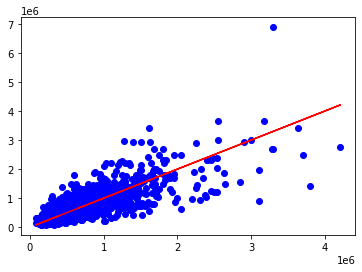

In [70]:
plt.scatter(y_test,Price, color="b")
plt.plot(y_test,y_test, color="r")

In [0]:
df = pd.DataFrame(np.random.randn(100, 3))

[https://stackoverflow.com/questions/61555486/what\-is\-x\-train\-reshape\-and\-what\-it\-does](https://stackoverflow.com/questions/61555486/what-is-x-train-reshape-and-what-it-does)  



/projects/a97d6307-9b0d-408a-ae28-2611511d3a18/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



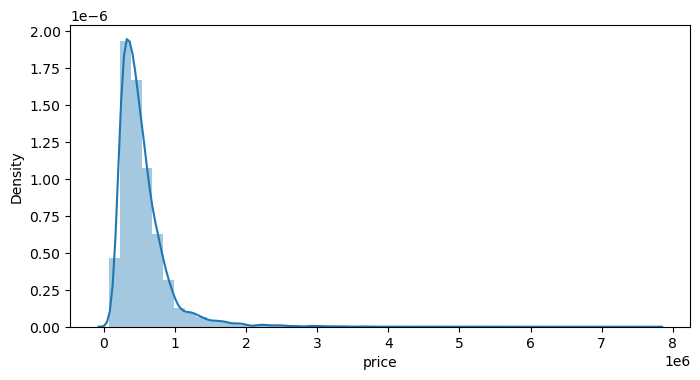

In [72]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.distplot(merged_zip['price'])
plt.show()

/projects/a97d6307-9b0d-408a-ae28-2611511d3a18/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



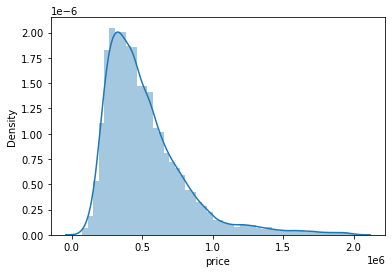

In [109]:
update_data = merged_zip[merged_zip['price'] < 2e6] 
sns.distplot(update_data['price'])
plt.show()

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X_tree = update_data.drop(["price"], axis = 1)
y_tree = update_data["price"]


regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)
#x_train= x_train.reshape(-1, 2)
#x_test = x_test.reshape(-1, 2)

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [111]:
Price = regressor.predict(x_test)

In [112]:
MEA= np.mean(abs(y_test - Price))
MEA

109860.09761793555

In [113]:
r2_score(y_test,Price)

0.6654756535880301

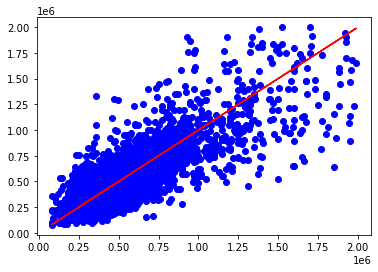

In [114]:
plt.scatter(y_test,Price, color="b")
plt.plot(y_test,y_test, color="r")

In [0]:
fig1 = px.scatter(merged_zip, x="sqft_above", y="price")
fig1.show()

In [118]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,40] }

tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=1)

tuning_model.fit(x_train, y_train)
print(tuning_model.best_params_)
Price = tuning_model.predict(x_test)
print(r2_score(y_test,Price))

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


{'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'}
0.40459383953078853


In [0]:
if sqft.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) 
np.random.shuffle(idx)

split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]

test_idx = idx[split_threshold:]

x_train, y_train = sqft[train_idx], y[train_idx]
x_test, y_test = sqft[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [0]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[58238.79689671] [269.86758074]


In [43]:
y_hat = linr.predict(x_test)

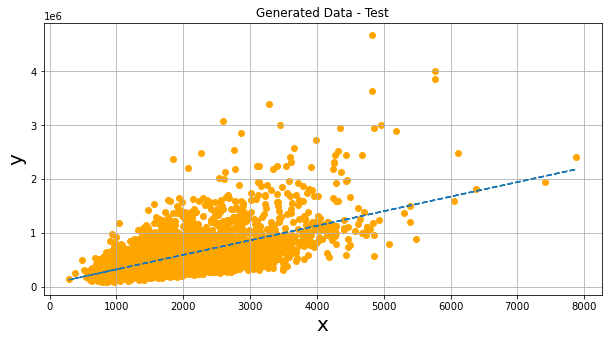

In [44]:
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [45]:
print(linr.score(x_test, y_test))

0.37469639393488985


### Neural Network:



In [95]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

NameError: name 'X_scale' is not defined

year/age compared to price 


<AxesSubplot:>

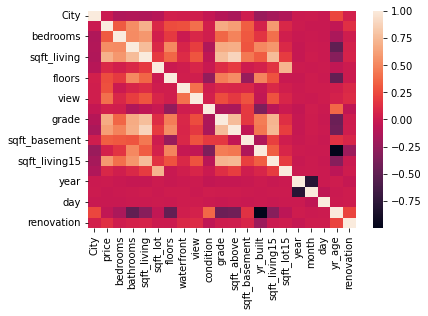

In [46]:
sns.heatmap(merged_zip.corr())

In [47]:
a = merged_zip["yr_age"].to_numpy()
b = merged_zip["price"].to_numpy()

In [48]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
a_train= a_train.reshape(-1, 1)
a_test = a_test.reshape(-1, 1)


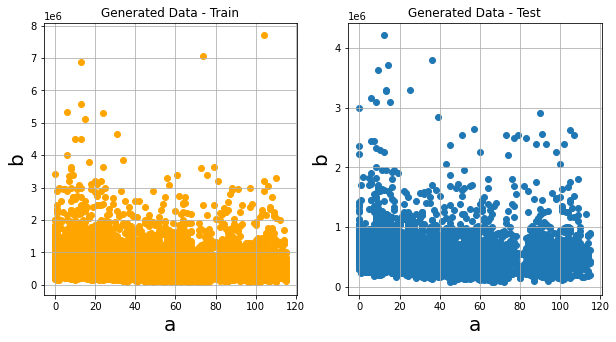

In [49]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(a_train,b_train, c='orange')  
plt.xlabel('a', fontsize = 20) 
plt.ylabel('b', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(a_test, b_test)  
plt.xlabel('a', fontsize = 20) 
plt.ylabel('b', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [50]:
fig1 = px.scatter(merged_zip, x="yr_age", y="price")
fig1.show()

In [51]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(a_train, b_train)
print(linr.intercept_, linr.coef_[0])

570920.9605436636 -701.2994146412311


In [52]:
b_hat = linr.predict(a_test)

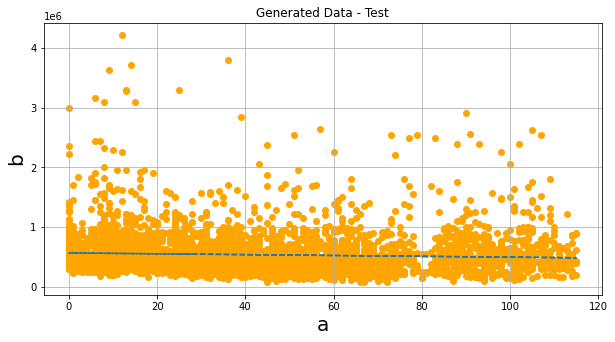

In [53]:
plt.figure(figsize=(10,5))
plt.plot(a_test, b_hat, '--')

plt.scatter(a_test,b_test, c='orange')  
plt.xlabel('a', fontsize = 20) 
plt.ylabel('b', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [54]:
print(linr.score(a_test, b_test))

0.002131120024567057


In [55]:
MAE = np.mean(abs(b_test - b_hat))
MAE

230994.89775927507

condition compared to price 


In [56]:
c = merged_zip["condition"].to_numpy()
d = merged_zip["price"].to_numpy()

In [57]:
from sklearn.model_selection import train_test_split

c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.2, random_state=42)
c_train= c_train.reshape(-1, 1)
c_test = c_test.reshape(-1, 1)

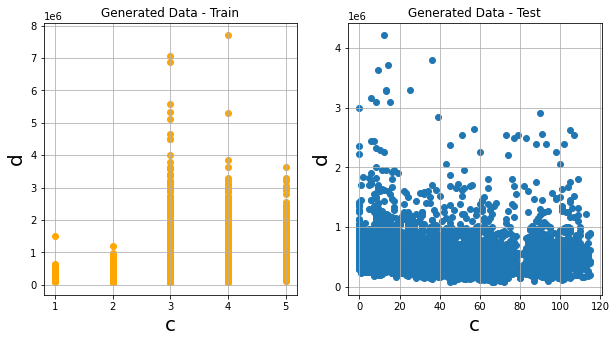

In [58]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
plt.scatter(c_train,d_train, c='orange')  
plt.xlabel('c', fontsize = 20) 
plt.ylabel('d', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.subplot(1,2,2)
plt.scatter(a_test, b_test)  
plt.xlabel('c', fontsize = 20) 
plt.ylabel('d', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [59]:
fig1 = px.scatter(merged_zip, x="condition", y="price")
fig1.show()